In [10]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

Tabla Diferencia Dividida
[['i   ', 'xi  ', 'fi  ', 'F[1]', 'F[2]', 'F[3]', 'F[4]', 'F[5]']]
[[ 0.0000e+00  1.0000e+00  7.6520e-01 -4.8371e-01 -1.0873e-01  6.5878e-02
   1.8251e-03  0.0000e+00]
 [ 1.0000e+00  1.3000e+00  6.2009e-01 -5.4895e-01 -4.9443e-02  6.8069e-02
   0.0000e+00  0.0000e+00]
 [ 2.0000e+00  1.6000e+00  4.5540e-01 -5.7861e-01  1.1818e-02  0.0000e+00
   0.0000e+00  0.0000e+00]
 [ 3.0000e+00  1.9000e+00  2.8182e-01 -5.7152e-01  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00]
 [ 4.0000e+00  2.2000e+00  1.1036e-01  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00]]
dDividida: 
[-0.4837 -0.1087  0.0659  0.0018  0.    ]
polinomio: 
-0.483705666666666*x + 0.00182510288066044*(x - 1.9)*(x - 1.6)*(x - 1.3)*(x - 1.0) + 0.0658783950617283*(x - 1.6)*(x - 1.3)*(x - 1.0) - 0.108733888888889*(x - 1.3)*(x - 1.0) + 1.24890336666667
polinomio evaluado en 1.5
0.511819994238683


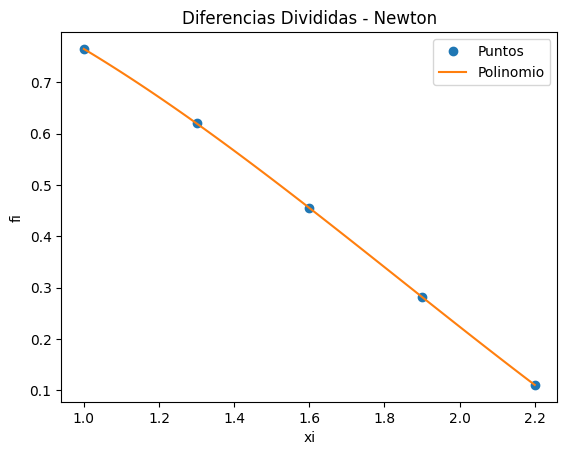

In [9]:
# INGRESO , Datos de prueba
xi = np.array([1.0, 1.3, 1.6, 1.9, 2.2])
fi = np.array([0.7651977, 0.6200860, 0.4554022, 0.2818186,0.1103623])

# PROCEDIMIENTO

# Tabla de Diferencias Divididas
titulo = ['i   ','xi  ','fi  ']
n = len(xi)
ki = np.arange(0,n,1)
tabla = np.concatenate(([ki],[xi],[fi]),axis=0)
tabla = np.transpose(tabla)

# diferencias divididas vacia
dfinita = np.zeros(shape=(n,n),dtype=float)
tabla = np.concatenate((tabla,dfinita), axis=1)

# Calcula tabla, inicia en columna 3
[n,m] = np.shape(tabla)
diagonal = n-1
j = 3
while (j < m):
    # Añade título para cada columna
    titulo.append('F['+str(j-2)+']')

    # cada fila de columna
    i = 0
    paso = j-2 # inicia en 1
    while (i < diagonal):
        denominador = (xi[i+paso]-xi[i])
        numerador = tabla[i+1,j-1]-tabla[i,j-1]
        tabla[i,j] = numerador/denominador
        i = i+1
    diagonal = diagonal - 1
    j = j+1

# POLINOMIO con diferencias Divididas
# caso: puntos equidistantes en eje x
dDividida = tabla[0,3:]
n = len(dfinita)

# expresión del polinomio con Sympy
x = sym.Symbol('x')
polinomio = fi[0]
for j in range(1,n,1):
    factor = dDividida[j-1]
    termino = 1
    for k in range(0,j,1):
        termino = termino*(x-xi[k])
    polinomio = polinomio + termino*factor

# simplifica multiplicando entre (x-xi)
polisimple = polinomio.expand()

# polinomio para evaluacion numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# SALIDA
np.set_printoptions(precision = 4)
print('Tabla Diferencia Dividida')
print([titulo])
print(tabla)
print('dDividida: ')
print(dDividida)
print('polinomio: ')
print(polinomio)
print('polinomio evaluado en 1.5')
print(polisimple.subs(x,1.5))
# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
##for i in range(0,n,1):
##    plt.axvline(xi[i],ls='--', color='yellow')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Diferencias Divididas - Newton')
plt.show()

In [33]:
print("------- Interpolacion Polinomica (Newton) -------")
n = int(input("Ingrese el grado del polinomio a evaluar: "))+1

print( "El grado del polinomio es: ", n)

matriz = [0.0] * n
for i in range(n):
    matriz[i] = [0.0] * n

vector = [0.0] * n

print(matriz)
print(vector)

for i in range(n):
    x = input("Ingrese el valor de x: ")
    y = input("Ingrese el valor de f("+x+"): ")
    vector[i]=float(x)
    matriz[i][0]=float(y)


print(vector)
print(matriz)

punto_a_evaluar = float(input("Ingrese el punto a evaluar: "))

print("------------------------------")
print("------- Calculando ... -------")
print("------------------------------")

for i in range(1,n):
    for j in range(i,n):
        print( "i=",i,"    j=",j)
        print( "(",matriz[j][i-1],"-",matriz[j-1][i-1],")/(",vector[j],"-",vector[j-i],")")
        matriz[j][i] = ( (matriz[j][i-1]-matriz[j-1][i-1]) / (vector[j]-vector[j-i]))
        print( "matriz[",j,"][",i,"] = ",(matriz[j][i-1]-matriz[j-1][i-1])/(vector[j]-vector[j-i]))

print("------------------------------")
print("------------------------------")
for i in range(n):
    print(matriz[i])
print( "------------------------------")
print( "------------------------------")

aprx = 0
mul = 1.0
for i in range(n):
    print( "matriz[",i,"][",i,"]","=",matriz[i][i])
    mul = matriz[i][i];
    print( "mul antes del ciclo j=",mul)
    for j in range(1,i+1):
        mul = mul * (punto_a_evaluar - vector[j-1])
        print( "mul en el ciclo j=",mul)
    # print aprx
    aprx = aprx + mul

print( "------------------------------")
print( "------------------------------")
print( "El valor aproximado de f(",punto_a_evaluar,") es: ", aprx)

------- Interpolacion Polinomica (Newton) -------
Ingrese el grado del polinomio a evaluar: 4
El grado del polinomio es:  5
[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0]]
[0.0, 0.0, 0.0, 0.0, 0.0]
Ingrese el valor de x: 1
Ingrese el valor de f(1): 0.7651977
Ingrese el valor de x: 1.3
Ingrese el valor de f(1.3):  0.6200860
Ingrese el valor de x: 1.6
Ingrese el valor de f(1.6): 0.4554022
Ingrese el valor de x: 1.9
Ingrese el valor de f(1.9): 0.2818186
Ingrese el valor de x: 2.2
Ingrese el valor de f(2.2):  0.1103623
[1.0, 1.3, 1.6, 1.9, 2.2]
[[0.7651977, 0.0, 0.0, 0.0, 0.0], [0.620086, 0.0, 0.0, 0.0, 0.0], [0.4554022, 0.0, 0.0, 0.0, 0.0], [0.2818186, 0.0, 0.0, 0.0, 0.0], [0.1103623, 0.0, 0.0, 0.0, 0.0]]
Ingrese el punto a evaluar: 1.5
------------------------------
------- Calculando ... -------
------------------------------
i= 1     j= 1
( 0.620086 - 0.7651977 )/( 1.3 - 1.0 )
matriz[ 1 ][ 1 ] =  -0